<a href="https://colab.research.google.com/github/Agustin-Galarza/tp_nlp/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import json
import re

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ruta completa al archivo CSV
archivo_json = '/content/drive/MyDrive/TP NLP/Corpus/ts/Repos_TypeScriptJan2022_duplicates_removed3.jsonl'

In [ ]:
objetos_json = []

with open(archivo_json, 'r') as file:
    for line in file:
        objeto = json.loads(line)
        objetos_json.append(objeto)

In [ ]:
objetos_json = json.dumps(objetos_json)

In [ ]:
# Función para contar palabras en un diccionario o lista
def contar_palabra(objeto, palabra):
    if isinstance(objeto, dict):
        conteo = 0
        for valor in objeto.values():
            conteo += contar_palabra(valor, palabra)
        return conteo
    elif isinstance(objeto, list):
        conteo = 0
        for item in objeto:
            conteo += contar_palabra(item, palabra)
        return conteo
    elif isinstance(objeto, str):
        palabras = objeto.split()
        return palabras.count(palabra)
    else:
        return 0

# Cuenta la cantidad de veces que aparece "function" y "return" en el contenido
conteo_function = contar_palabra(objetos_json, "function")
conteo_return = contar_palabra(objetos_json, "return")

# Imprime los resultados
print("La palabra 'function' aparece {} veces en el archivo JSON.".format(conteo_function))
print("La palabra 'return' aparece {} veces en el archivo JSON.".format(conteo_return))

La palabra 'function' aparece 163 veces en el archivo JSON.
La palabra 'return' aparece 468 veces en el archivo JSON.


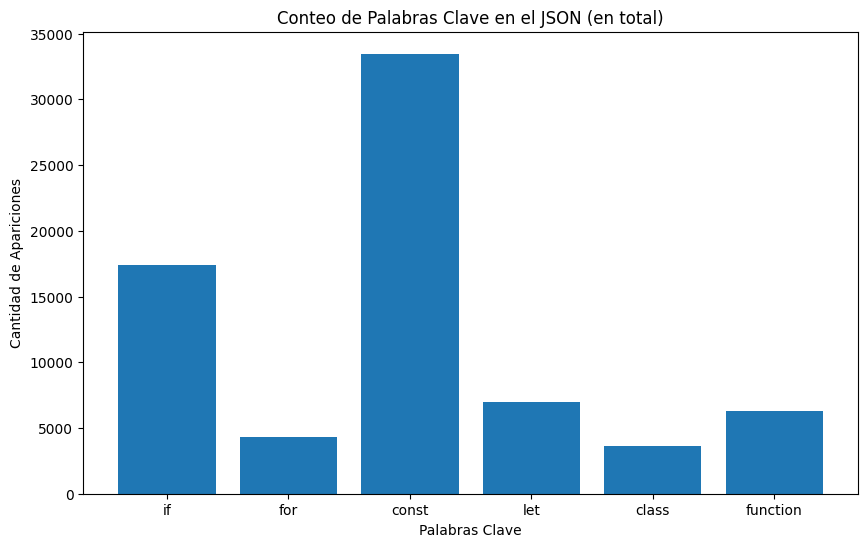

In [ ]:
# Definimos las palabras que queremos contar
palabras_clave = ["if", "for", "const", "let", "class", "function"]

# Creamos un diccionario para almacenar el conteo de cada palabra clave
conteo_palabras = {palabra: len(re.findall(r'\b' + palabra + r'\b', objetos_json)) for palabra in palabras_clave}

# Extraemos las palabras clave y sus conteos
palabras = list(conteo_palabras.keys())
conteos = list(conteo_palabras.values())

# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, conteos)
plt.xlabel('Palabras Clave')
plt.ylabel('Cantidad de Apariciones')
plt.title('Conteo de Palabras Clave en el JSON (en total)')
plt.show()


In [ ]:
objeto = json.loads(objetos_json)